# define imports and get data

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from titeseq_functions import *
from multiprocessing import Pool
from functools import partial
import seaborn as sns

In [6]:
data_location = '/scratch/gthurber_root/gthurber0/marcase/titeseq/'
#upload Kinney 2016 data
rep1 = 'jbkinney_rep1.csv'
rep2 = 'jbkinney_rep2.csv'
rep3 = 'jbkinney_rep3.csv'

rep1 = pd.read_csv(data_location+rep1)
rep2 = pd.read_csv(data_location+rep2)
rep3 = pd.read_csv(data_location+rep3)
rep1.columns.values

array(['Unnamed: 0', 'CDR1H', 'CDR1H_AA', 'CDR3H', 'CDR3H_AA', 'basal',
       'cmyc0', 'cmyc1', 'cmyc2', 'cmyc3', 'expression', 'fit_KD',
       'fit_KD_sigma', 'fit_fraction', 'fit_saturation',
       'fluorescein0bin0', 'fluorescein0bin1', 'fluorescein0bin2',
       'fluorescein0bin3', 'fluorescein10^-5.5bin0',
       'fluorescein10^-5.5bin1', 'fluorescein10^-5.5bin2',
       'fluorescein10^-5.5bin3', 'fluorescein10^-5bin0',
       'fluorescein10^-5bin1', 'fluorescein10^-5bin2',
       'fluorescein10^-5bin3', 'fluorescein10^-6.5bin0',
       'fluorescein10^-6.5bin1', 'fluorescein10^-6.5bin2',
       'fluorescein10^-6.5bin3', 'fluorescein10^-6bin0',
       'fluorescein10^-6bin1', 'fluorescein10^-6bin2',
       'fluorescein10^-6bin3', 'fluorescein10^-7.5bin0',
       'fluorescein10^-7.5bin1', 'fluorescein10^-7.5bin2',
       'fluorescein10^-7.5bin3', 'fluorescein10^-7bin0',
       'fluorescein10^-7bin1', 'fluorescein10^-7bin2',
       'fluorescein10^-7bin3', 'fluorescein10^-8.5bin0',


In [7]:
columns = ['prob_cmyc0', 'prob_cmyc1', 'prob_cmyc2',
       'prob_cmyc3', 'prob_fluorescein0bin0', 'prob_fluorescein0bin1',
       'prob_fluorescein0bin2', 'prob_fluorescein0bin3',
       'prob_fluorescein10^-5.5bin0', 'prob_fluorescein10^-5.5bin1',
       'prob_fluorescein10^-5.5bin2', 'prob_fluorescein10^-5.5bin3',
       'prob_fluorescein10^-5bin0', 'prob_fluorescein10^-5bin1',
       'prob_fluorescein10^-5bin2', 'prob_fluorescein10^-5bin3',
       'prob_fluorescein10^-6.5bin0', 'prob_fluorescein10^-6.5bin1',
       'prob_fluorescein10^-6.5bin2', 'prob_fluorescein10^-6.5bin3',
       'prob_fluorescein10^-6bin0', 'prob_fluorescein10^-6bin1',
       'prob_fluorescein10^-6bin2', 'prob_fluorescein10^-6bin3',
       'prob_fluorescein10^-7.5bin0', 'prob_fluorescein10^-7.5bin1',
       'prob_fluorescein10^-7.5bin2', 'prob_fluorescein10^-7.5bin3',
       'prob_fluorescein10^-7bin0', 'prob_fluorescein10^-7bin1',
       'prob_fluorescein10^-7bin2', 'prob_fluorescein10^-7bin3',
       'prob_fluorescein10^-8.5bin0', 'prob_fluorescein10^-8.5bin1',
       'prob_fluorescein10^-8.5bin2', 'prob_fluorescein10^-8.5bin3',
       'prob_fluorescein10^-8bin0', 'prob_fluorescein10^-8bin1',
       'prob_fluorescein10^-8bin2', 'prob_fluorescein10^-8bin3',
       'prob_fluorescein10^-9.5bin0', 'prob_fluorescein10^-9.5bin1',
       'prob_fluorescein10^-9.5bin2', 'prob_fluorescein10^-9.5bin3',
       'prob_fluorescein10^-9bin0', 'prob_fluorescein10^-9bin1',
       'prob_fluorescein10^-9bin2', 'prob_fluorescein10^-9bin3']

fit_data_rep1 = rep1[columns]
fit_data_rep2 = rep2[columns]
fit_data_rep3 = rep3[columns]
fit_data_rep1

,prob_cmyc0,prob_cmyc1,prob_cmyc2,prob_cmyc3,prob_fluorescein0bin0,prob_fluorescein0bin1,prob_fluorescein0bin2,prob_fluorescein0bin3,prob_fluorescein10^-5.5bin0,prob_fluorescein10^-5.5bin1,...,prob_fluorescein10^-8bin2,prob_fluorescein10^-8bin3,prob_fluorescein10^-9.5bin0,prob_fluorescein10^-9.5bin1,prob_fluorescein10^-9.5bin2,prob_fluorescein10^-9.5bin3,prob_fluorescein10^-9bin0,prob_fluorescein10^-9bin1,prob_fluorescein10^-9bin2,prob_fluorescein10^-9bin3
0,0.149360,0.159953,0.397564,0.293123,0.430458,0.569539,0.000003,0.000000,0.162572,0.000000,...,0.365479,0.629062,0.180594,0.483766,0.281212,0.054428,0.140920,0.073207,0.411365,0.374509
1,0.404120,0.071037,0.471563,0.053280,0.461805,0.536208,0.001584,0.000403,0.158382,0.713488,...,0.048886,0.012336,0.084646,0.914702,0.000189,0.000464,0.677776,0.244706,0.077487,0.000031
2,0.636363,0.008806,0.347460,0.007371,0.916562,0.080753,0.002684,0.000002,0.095001,0.871095,...,0.000000,0.000195,0.087773,0.901249,0.010968,0.000011,0.972796,0.023485,0.003484,0.000234
3,0.000000,0.378439,0.259010,0.362551,0.638652,0.360412,0.000936,0.000000,0.139235,0.000000,...,0.510889,0.480208,0.303466,0.515071,0.175855,0.005608,0.000000,0.000000,0.681083,0.318917
4,0.712843,0.042371,0.228090,0.016697,0.996840,0.000000,0.003160,0.000000,0.335488,0.344036,...,0.000494,0.000000,0.279583,0.720178,0.000000,0.000239,0.368919,0.621367,0.009219,0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,0.338567,0.069383,0.504872,0.087178,0.318508,0.680336,0.001156,0.000000,0.000000,0.000000,...,0.376106,0.023318,0.199835,0.798699,0.001427,0.000039,0.169909,0.829667,0.000348,0.000075
3675,0.735052,0.124367,0.124665,0.015916,0.453019,0.546421,0.000559,0.000000,0.040131,0.431764,...,0.441373,0.006533,0.132541,0.803976,0.062504,0.000979,0.282165,0.712265,0.000244,0.005325
3676,0.565724,0.162900,0.165600,0.105776,0.955524,0.027734,0.016742,0.000000,0.078955,0.454285,...,0.206364,0.123836,0.391678,0.577291,0.026668,0.004363,0.137419,0.370325,0.151091,0.341165
3677,0.371832,0.244741,0.288773,0.094653,0.419147,0.580520,0.000332,0.000000,0.180875,0.819125,...,0.000000,0.000000,0.279479,0.426058,0.292594,0.001869,0.960129,0.009452,0.000000,0.030420


### define concentrations done in titeseq

In [8]:
concs = ['sortseq',0,10**-5.5,10**-5,10**-6.5,10**-6,10**-7.5,10**-7,10**-8.5,10**-8,10**-9.5,10**-9]

## define filter parameters and get filtered data

In [9]:
#filter data
bin_read_fraction=0.5 #quality control parameter
bin_read_threshold=1 #quality control parameter
bimodal_removal=True #quality control parameter
bimodal_removal_threshold=0.8 #quality control parameter
minimum_fraction_removal=0 #quality control parameter
num_bins=4 #from experiment set-up
num_concs=12 #from experiment set-up
filtered_bin_frequencies1,masked_concs1 = filterClones(fit_data_rep1,bin_read_fraction,bin_read_threshold,bimodal_removal,bimodal_removal_threshold,
                 minimum_fraction_removal,num_bins,num_concs)
filtered_bin_frequencies2,masked_concs2 = filterClones(fit_data_rep2,bin_read_fraction,bin_read_threshold,bimodal_removal,bimodal_removal_threshold,
                 minimum_fraction_removal,num_bins,num_concs)
filtered_bin_frequencies3,masked_concs3 = filterClones(fit_data_rep3,bin_read_fraction,bin_read_threshold,bimodal_removal,bimodal_removal_threshold,
                 minimum_fraction_removal,num_bins,num_concs)

/home/marcase/titeseq/titeseq_functions.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_frequencies[bin_frequencies <= minimum_fraction_removal] = 0
/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [10]:
filtered_bin_frequencies1

,prob_cmyc0,prob_cmyc1,prob_cmyc2,prob_cmyc3,prob_fluorescein0bin0,prob_fluorescein0bin1,prob_fluorescein0bin2,prob_fluorescein0bin3,prob_fluorescein10^-5.5bin0,prob_fluorescein10^-5.5bin1,...,prob_fluorescein10^-8bin2,prob_fluorescein10^-8bin3,prob_fluorescein10^-9.5bin0,prob_fluorescein10^-9.5bin1,prob_fluorescein10^-9.5bin2,prob_fluorescein10^-9.5bin3,prob_fluorescein10^-9bin0,prob_fluorescein10^-9bin1,prob_fluorescein10^-9bin2,prob_fluorescein10^-9bin3
0,0.149360,0.159953,0.397564,0.293123,0.430458,0.569539,0.000003,0.000000,0.162572,0.000000,...,0.365479,0.629062,0.180594,0.483766,0.281212,0.054428,0.140920,0.073207,0.411365,0.374509
1,0.404120,0.071037,0.471563,0.053280,0.461805,0.536208,0.001584,0.000403,0.158382,0.713488,...,0.048886,0.012336,0.084646,0.914702,0.000189,0.000464,0.677776,0.244706,0.077487,0.000031
2,0.636363,0.008806,0.347460,0.007371,0.916562,0.080753,0.002684,0.000002,0.095001,0.871095,...,0.000000,0.000195,0.087773,0.901249,0.010968,0.000011,0.972796,0.023485,0.003484,0.000234
3,0.000000,0.378439,0.259010,0.362551,0.638652,0.360412,0.000936,0.000000,0.139235,0.000000,...,0.510889,0.480208,0.303466,0.515071,0.175855,0.005608,0.000000,0.000000,0.681083,0.318917
4,0.712843,0.042371,0.228090,0.016697,0.996840,0.000000,0.003160,0.000000,0.335488,0.344036,...,0.000494,0.000000,0.279583,0.720178,0.000000,0.000239,0.368919,0.621367,0.009219,0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,0.338567,0.069383,0.504872,0.087178,0.318508,0.680336,0.001156,0.000000,0.000000,0.000000,...,0.376106,0.023318,0.199835,0.798699,0.001427,0.000039,0.169909,0.829667,0.000348,0.000075
3675,0.735052,0.124367,0.124665,0.015916,0.453019,0.546421,0.000559,0.000000,0.040131,0.431764,...,0.441373,0.006533,0.132541,0.803976,0.062504,0.000979,0.282165,0.712265,0.000244,0.005325
3676,0.565724,0.162900,0.165600,0.105776,0.955524,0.027734,0.016742,0.000000,0.078955,0.454285,...,0.206364,0.123836,0.391678,0.577291,0.026668,0.004363,0.137419,0.370325,0.151091,0.341165
3677,0.371832,0.244741,0.288773,0.094653,0.419147,0.580520,0.000332,0.000000,0.180875,0.819125,...,0.000000,0.000000,0.279479,0.426058,0.292594,0.001869,0.960129,0.009452,0.000000,0.030420


In [11]:
masked_concs1

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3674,0,0,0,0,0,0,0,0,0,0,0,0
3675,0,0,0,0,0,0,0,0,0,0,0,0
3676,0,0,0,0,0,0,0,0,0,0,0,0
3677,0,0,0,0,0,0,0,0,0,0,0,0


## get bin scores for each replicate

In [12]:
fit_data1 = getBinScores(filtered_bin_frequencies1,masked_concs1,num_concs=num_concs,num_bins=num_bins)
fit_data2 = getBinScores(filtered_bin_frequencies2,masked_concs2,num_concs=num_concs,num_bins=num_bins)
fit_data3 = getBinScores(filtered_bin_frequencies3,masked_concs3,num_concs=num_concs,num_bins=num_bins)

In [13]:
fit_data1

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.834451,1.569545,3.369927,3.264079,3.998259,3.196727,3.453143,3.257506,2.451783,3.618143,2.209474,3.019463
1,2.174002,1.540586,2.001071,1.630480,1.953078,1.983277,1.857857,2.182019,2.023933,1.360640,1.916470,1.399773
2,1.725840,1.086125,1.941024,1.750859,1.551687,2.003308,2.024509,1.845940,1.722417,1.036668,1.923216,1.031157
3,2.984113,1.362284,3.530077,3.379399,2.833244,2.705771,2.848976,3.721234,2.502031,3.462401,1.883605,3.318917
4,1.548639,1.006320,2.160791,1.570849,1.275791,2.599169,1.772737,1.320509,1.928992,1.953480,1.720894,1.641291
...,...,...,...,...,...,...,...,...,...,...,...,...
3674,2.340662,1.682648,3.026601,2.343313,2.328519,2.833033,2.801043,3.183338,1.983070,2.422742,1.801669,1.830589
3675,1.421446,1.547540,2.582207,2.590692,2.594363,2.842495,2.423229,2.399264,2.158470,2.336727,1.931922,1.728729
3676,1.811427,1.061217,2.539235,3.138851,2.351407,1.265588,2.788717,2.563005,1.812953,2.031100,1.643717,2.696003
3677,2.106247,1.581185,1.819125,1.796055,1.002828,1.540214,3.193601,1.784623,1.669157,1.727876,2.016853,1.100711


### plot sample fit

<AxesSubplot:>

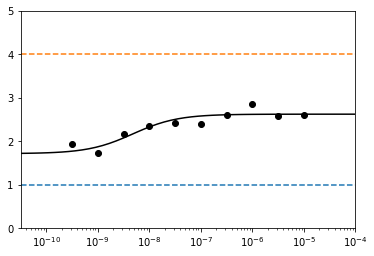

In [14]:
barcode=3675
plotCurveFit(fit_data1,barcode,concs)

## fit data using in-house scripts

In [15]:
ncpus = 16
fit_params1 = multiprocessFit(fit_data1,ncpus,concs,n_bins=4,verbose=False)
fit_params2 = multiprocessFit(fit_data2,ncpus,concs,n_bins=4,verbose=False)
fit_params3 = multiprocessFit(fit_data3,ncpus,concs,n_bins=4,verbose=False)

### plot distribution of fit Kd's

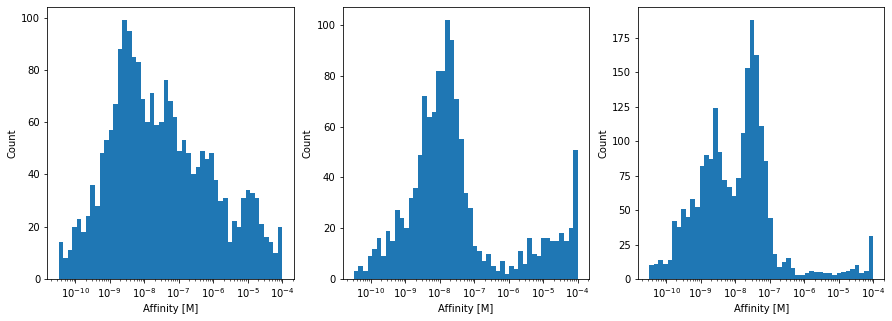

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i,ax in enumerate(np.ravel(axes)):
    if i == 0:
        plotDatasetHistogram(fit_params1,concs,ax=ax)
    elif i == 1:
        plotDatasetHistogram(fit_params2,concs,ax=ax)
    else:
        plotDatasetHistogram(fit_params3,concs,ax=ax)

### merge all fit parameters together

In [17]:
rep1_merge = pd.concat([rep1,fit_params1],join='outer',axis=1)
rep2_merge = pd.concat([rep2,fit_params2],join='outer',axis=1)
rep3_merge = pd.concat([rep3,fit_params3],join='outer',axis=1)

In [18]:
rep1_merge

,Unnamed: 0,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,basal,cmyc0,cmyc1,cmyc2,cmyc3,...,prob_fluorescein10^-9bin0,prob_fluorescein10^-9bin1,prob_fluorescein10^-9bin2,prob_fluorescein10^-9bin3,unsorted,unsorted_CDR1H,unsorted_CDR3H,bottom,top,Kd
0,0,ACTTTTGGGGACTACTGGATGAACTGGGTC,TFGDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.592561,311,797,1486,3664,...,0.140920,0.073207,0.411365,0.374509,121,171,0,1.911787,3.447258,0.0
1,1,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCCAATCGTCCATACCATAGTAAGATGA,SSYYGMDDWG,2.592561,1405,591,2943,1112,...,0.677776,0.244706,0.077487,0.000031,680,0,110,1.660078,1.947376,0.0
2,2,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,AGGCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWP,2.592561,604,20,592,42,...,0.972796,0.023485,0.003484,0.000234,142,0,61,1.358124,1.860724,0.0
3,3,ACTTTTGCGGACTACTGGCTCAACTGGGTC,TFADYWLNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.592561,0,1081,555,2598,...,0.000000,0.000000,0.681083,0.318917,366,178,0,1.907936,3.260663,0.0
4,4,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCCAGTAGATCATACCATAGTACCAACC,GWYYGMIYWG,2.592561,1842,262,1058,259,...,0.368919,0.621367,0.009219,0.000496,0,0,32,1.256989,1.840264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,3674,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCCACCAGTCTATACCATAGTAAGAACC,GSYYGIDWWG,2.592561,885,434,2369,1368,...,0.169909,0.829667,0.000348,0.000075,183,0,12,1.709525,2.767569,0.0
3675,3675,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCTTGTAGTCCATACCGAAGTAAGAACC,GSYFGMDYKG,2.592561,3485,1411,1061,453,...,0.282165,0.712265,0.000244,0.005325,59,0,141,1.710335,2.617423,0.0
3676,3676,ACTTTTAGTGACTACTGGAACAACTGGGTC,TFSDYWNNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.592561,923,636,485,1036,...,0.137419,0.370325,0.151091,0.341165,44,116,0,2.019613,4.0,0.000011
3677,3677,ACTTTGACCGACTACTGGATGAACTGGTGG,TLTDYWMNWW,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.592561,746,1175,1040,1140,...,0.960129,0.009452,0.000000,0.030420,211,58,0,0.0,0.0,0.0


In [19]:
columns_to_drop = ['Unnamed: 0','basal',
       'cmyc0', 'cmyc1', 'cmyc2', 'cmyc3', 'expression','fit_fraction', 'fit_saturation',
       'fluorescein0bin0', 'fluorescein0bin1', 'fluorescein0bin2',
       'fluorescein0bin3', 'fluorescein10^-5.5bin0',
       'fluorescein10^-5.5bin1', 'fluorescein10^-5.5bin2',
       'fluorescein10^-5.5bin3', 'fluorescein10^-5bin0',
       'fluorescein10^-5bin1', 'fluorescein10^-5bin2',
       'fluorescein10^-5bin3', 'fluorescein10^-6.5bin0',
       'fluorescein10^-6.5bin1', 'fluorescein10^-6.5bin2',
       'fluorescein10^-6.5bin3', 'fluorescein10^-6bin0',
       'fluorescein10^-6bin1', 'fluorescein10^-6bin2',
       'fluorescein10^-6bin3', 'fluorescein10^-7.5bin0',
       'fluorescein10^-7.5bin1', 'fluorescein10^-7.5bin2',
       'fluorescein10^-7.5bin3', 'fluorescein10^-7bin0',
       'fluorescein10^-7bin1', 'fluorescein10^-7bin2',
       'fluorescein10^-7bin3', 'fluorescein10^-8.5bin0',
       'fluorescein10^-8.5bin1', 'fluorescein10^-8.5bin2',
       'fluorescein10^-8.5bin3', 'fluorescein10^-8bin0',
       'fluorescein10^-8bin1', 'fluorescein10^-8bin2',
       'fluorescein10^-8bin3', 'fluorescein10^-9.5bin0',
       'fluorescein10^-9.5bin1', 'fluorescein10^-9.5bin2',
       'fluorescein10^-9.5bin3', 'fluorescein10^-9bin0',
       'fluorescein10^-9bin1', 'fluorescein10^-9bin2',
       'fluorescein10^-9bin3', 'prob_cmyc0', 'prob_cmyc1', 'prob_cmyc2',
       'prob_cmyc3', 'prob_fluorescein0bin0', 'prob_fluorescein0bin1',
       'prob_fluorescein0bin2', 'prob_fluorescein0bin3',
       'prob_fluorescein10^-5.5bin0', 'prob_fluorescein10^-5.5bin1',
       'prob_fluorescein10^-5.5bin2', 'prob_fluorescein10^-5.5bin3',
       'prob_fluorescein10^-5bin0', 'prob_fluorescein10^-5bin1',
       'prob_fluorescein10^-5bin2', 'prob_fluorescein10^-5bin3',
       'prob_fluorescein10^-6.5bin0', 'prob_fluorescein10^-6.5bin1',
       'prob_fluorescein10^-6.5bin2', 'prob_fluorescein10^-6.5bin3',
       'prob_fluorescein10^-6bin0', 'prob_fluorescein10^-6bin1',
       'prob_fluorescein10^-6bin2', 'prob_fluorescein10^-6bin3',
       'prob_fluorescein10^-7.5bin0', 'prob_fluorescein10^-7.5bin1',
       'prob_fluorescein10^-7.5bin2', 'prob_fluorescein10^-7.5bin3',
       'prob_fluorescein10^-7bin0', 'prob_fluorescein10^-7bin1',
       'prob_fluorescein10^-7bin2', 'prob_fluorescein10^-7bin3',
       'prob_fluorescein10^-8.5bin0', 'prob_fluorescein10^-8.5bin1',
       'prob_fluorescein10^-8.5bin2', 'prob_fluorescein10^-8.5bin3',
       'prob_fluorescein10^-8bin0', 'prob_fluorescein10^-8bin1',
       'prob_fluorescein10^-8bin2', 'prob_fluorescein10^-8bin3',
       'prob_fluorescein10^-9.5bin0', 'prob_fluorescein10^-9.5bin1',
       'prob_fluorescein10^-9.5bin2', 'prob_fluorescein10^-9.5bin3',
       'prob_fluorescein10^-9bin0', 'prob_fluorescein10^-9bin1',
       'prob_fluorescein10^-9bin2', 'prob_fluorescein10^-9bin3',
       'unsorted', 'unsorted_CDR1H', 'unsorted_CDR3H']
rep1_merge=rep1_merge.rename(columns={"top":"top_1","bottom":"bottom_1","Kd":"Kd_1","fit_KD":"fit_KD_1","fit_KD_sigma":"fit_KD_sigma_1"}).drop(columns=columns_to_drop).set_index(['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA'])
rep2_merge=rep2_merge.rename(columns={"top":"top_2","bottom":"bottom_2","Kd":"Kd_2","fit_KD":"fit_KD_2","fit_KD_sigma":"fit_KD_sigma_2"}).drop(columns=columns_to_drop).set_index(['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA'])
rep3_merge=rep3_merge.rename(columns={"top":"top_3","bottom":"bottom_3","Kd":"Kd_3","fit_KD":"fit_KD_3","fit_KD_sigma":"fit_KD_sigma_3"}).drop(columns=columns_to_drop).set_index(['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA'])

In [20]:
all_data = pd.concat([rep1_merge,rep2_merge,rep3_merge],join='outer',axis=1)

In [21]:
all_data

,,,,fit_KD_1,fit_KD_sigma_1,bottom_1,top_1,Kd_1,fit_KD_2,fit_KD_sigma_2,bottom_2,top_2,Kd_2,fit_KD_3,fit_KD_sigma_3,bottom_3,top_3,Kd_3
CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,,,,,,,,,,,,,,,
AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,2.150305e-09,2.877315e-02,1.739289,3.57529,0.0,4.097321e-10,1.233956e-01,0.0,0.0,0.0,5.040806e-10,2.304446e-02,1.624784,3.30306,0.0
AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,3.715352e-08,7.545361e-04,1.342356,2.735451,0.0,1.000000e-05,5.741405e-04,NaN,NaN,NaN,9.172759e-09,1.394896e-02,1.434525,2.826896,0.0
AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,1.462227e-78,NaN,NaN,NaN,1.000000e-05,6.284835e-34,NaN,NaN,NaN,1.000000e-05,8.370637e-76,0.0,0.0,0.0
AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,3.489924e-47,1.423728,1.974225,0.0,1.000000e-05,7.116351e-32,NaN,NaN,NaN,1.000000e-05,1.321824e-42,1.638154,1.92283,0.0
AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,4.245572e-07,NaN,NaN,NaN,6.958250e-06,5.081689e-02,NaN,NaN,NaN,4.597270e-06,4.514893e-02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,7.750417e-29,NaN,NaN,NaN,1.000000e-05,9.425554e-18,NaN,NaN,NaN,1.000000e-05,9.619143e-22,1.588565,2.067151,0.0
TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,3.801894e-09,2.193324e-02,1.874532,2.814975,0.0,4.677351e-09,3.144558e-02,NaN,NaN,NaN,5.463865e-09,1.606536e-02,1.825989,3.028533,0.0
TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1.000000e-05,1.061264e-08,NaN,NaN,NaN,1.000000e-05,5.057135e-02,NaN,NaN,NaN,1.000000e-05,2.068179e-03,NaN,NaN,NaN


### export data for downstream analysis

In [22]:
all_data.to_csv('jbkinney_fit_params.csv')

## visualize data and check correlations

(1e-11, 0.0001)

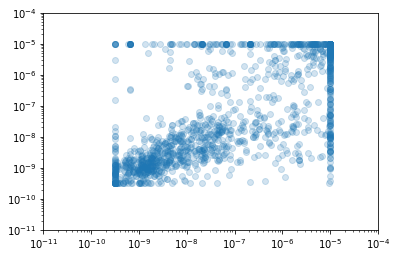

In [23]:
plt.scatter(all_data['fit_KD_2'],all_data['fit_KD_3'],alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-11,1e-4])
plt.ylim([1e-11,1e-4])

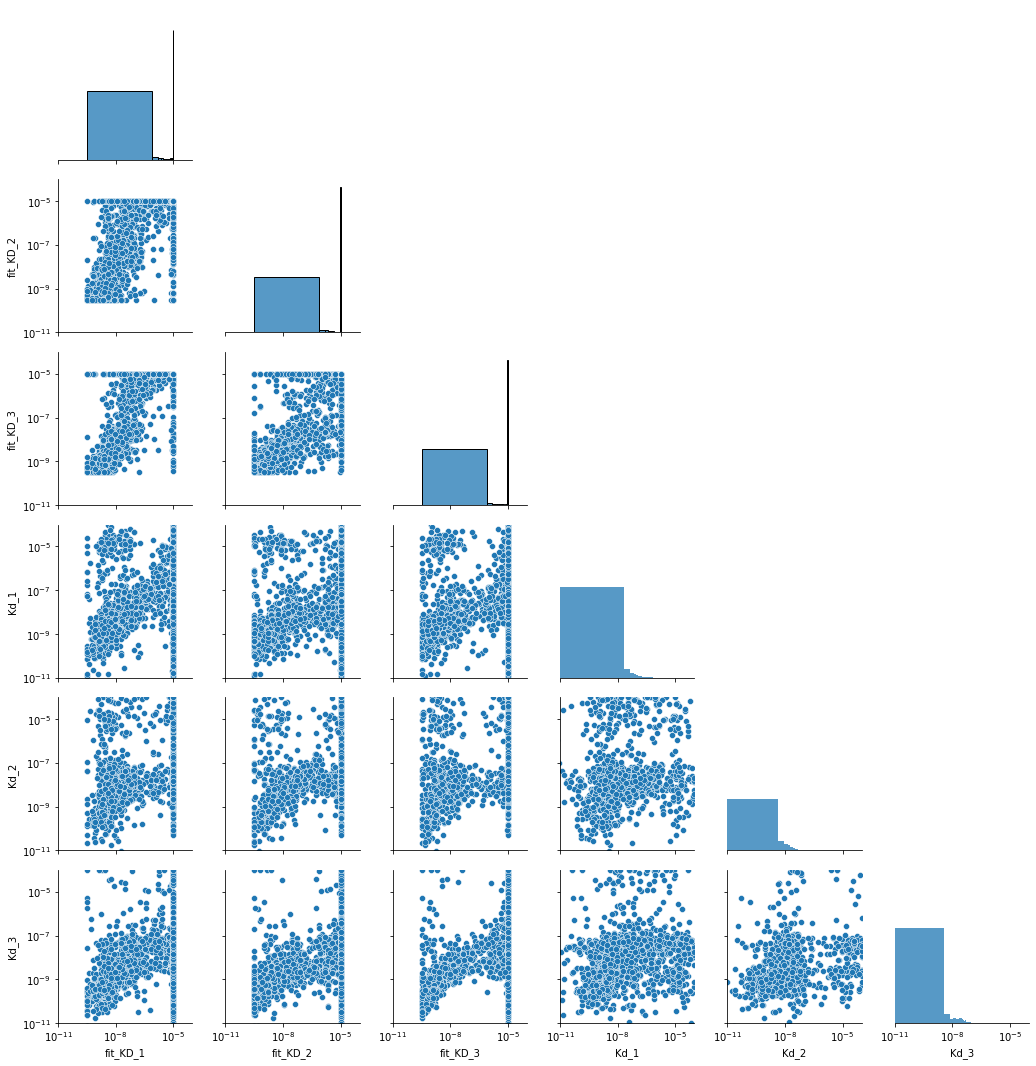

In [24]:
pp = sns.pairplot(all_data[['fit_KD_1','fit_KD_2','fit_KD_3','Kd_1','Kd_2','Kd_3']],corner=True)
for ax in pp.axes.flat:
    if ax is not None:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim([1e-11,1e-4])
        ax.set_ylim([1e-11,1e-4])

## output data for binary analysis (only take the columns at the average Kd corresponding to top and bottom bins)

In [26]:
#output data as if it was sorted without titeseq- one positive bin and one negative bin @ average Kd (1nM = 1e-8 M)
columns = ['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA','fluorescein10^-8bin0','fluorescein10^-8bin3']

binary_data_rep1 = rep1[columns]
binary_data_rep2 = rep2[columns]
binary_data_rep3 = rep3[columns]
binary_data_rep1

,CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,fluorescein10^-8bin0,fluorescein10^-8bin3
0,ACTTTTGGGGACTACTGGATGAACTGGGTC,TFGDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1,893
1,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCCAATCGTCCATACCATAGTAAGATGA,SSYYGMDDWG,1305,175
2,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,AGGCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWP,639,1
3,ACTTTTGCGGACTACTGGCTCAACTGGGTC,TFADYWLNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,1,418
4,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCCAGTAGATCATACCATAGTACCAACC,GWYYGMIYWG,65,0
...,...,...,...,...,...,...
3674,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCCACCAGTCTATACCATAGTAAGAACC,GSYYGIDWWG,0,182
3675,ACTTTTAGTGACTACTGGATGAACTGGGTC,TFSDYWMNWV,ACCCTTGTAGTCCATACCGAAGTAAGAACC,GSYFGMDYKG,458,197
3676,ACTTTTAGTGACTACTGGAACAACTGGGTC,TFSDYWNNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,182,413
3677,ACTTTGACCGACTACTGGATGAACTGGTGG,TLTDYWMNWW,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,195,0


In [31]:
binary_rep1_merge=binary_data_rep1.rename(columns={'fluorescein10^-8bin0':'fluorescein10^-8bin0_A','fluorescein10^-8bin3':'fluorescein10^-8bin3_A'}).set_index(['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA'])
binary_rep2_merge=binary_data_rep2.rename(columns={'fluorescein10^-8bin0':'fluorescein10^-8bin0_B','fluorescein10^-8bin3':'fluorescein10^-8bin3_B'}).set_index(['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA'])
binary_rep3_merge=binary_data_rep3.rename(columns={'fluorescein10^-8bin0':'fluorescein10^-8bin0_C','fluorescein10^-8bin3':'fluorescein10^-8bin3_C'}).set_index(['CDR1H','CDR1H_AA','CDR3H','CDR3H_AA'])
binary_all_data = pd.concat([binary_rep1_merge,binary_rep2_merge,binary_rep3_merge],join='outer',axis=1)

In [32]:
binary_all_data

,,,,fluorescein10^-8bin0_A,fluorescein10^-8bin3_A,fluorescein10^-8bin0_B,fluorescein10^-8bin3_B,fluorescein10^-8bin0_C,fluorescein10^-8bin3_C
CDR1H,CDR1H_AA,CDR3H,CDR3H_AA,,,,,,
AAATATAGTGACTACTGGATGAACTGGGTC,KYSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,511.0,120.0,128.0,1.0,1143.0
AAATGCAGTGACTACTGGATGAACTGGGTC,KCSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,80.0,1.0,250.0,0.0,3.0,70.0
AAATTTAGTGACTACGACATGAACTGGGTC,KFSDYDMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,268.0,1.0,752.0,1.0,104.0,141.0
AAATTTAGTGACTACTCAATGAACTGGGTC,KFSDYSMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,110.0,0.0,2052.0,0.0,122.0,13.0
AAATTTAGTGACTACTGGAAGAACTGGGTC,KFSDYWKNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,1.0,262.0,3.0,0.0,99.0
...,...,...,...,...,...,...,...,...,...
TTTCGGAGTGACTACTGGATGAACTGGGTC,FRSDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,126.0,213.0,800.0,0.0,66.0,2.0
TTTTTTACTGACTACTGGATGAACTGGGTC,FFTDYWMNWV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,0.0,79.0,0.0,177.0,34.0,170.0
TTTTTTAGTGACTACTGGATGAACCACGTC,FFSDYWMNHV,ACCCCAGTAGTCCATACCATAGTAAGAACC,GSYYGMDYWG,126.0,0.0,0.0,0.0,0.0,0.0


### output binary data

In [33]:
binary_all_data.to_csv('binary_jbkinney2016.csv')